In [ ]:
#IMPORTANT LINKS!!

#http://rpubs.com/rasmusab/live_coding_user_2015_bayes_tutorial
#http://www.sumsar.net/files/academia/user_2015_tutorial_bayesian_data_analysis_short_version.pdf

# Intro

There can be upto 100,000 fish in a given lake. However how can we be certain of this hypothesis. Using bayesian analysis and some assumptions we can try to narrow down the total number of fish in the lake. 

The scope of the project is to determine the total number of fish in a lake, given its size. Perform hypothesis analysis given an expert

When first introduced to baeysian statistics, sutdents were often given a well known prior probability as well as a pre defined likelihood function, typically bernoullian in nature. We then "turn the bayesian crank" and are presented with a well defined and easily interpreable posterior probability. However, as is often the case, the prior probability is unknown and the likelihood distribution is more gaussian (or any other distribution) than bernoullian. Thus it is important to demonstrate how one can still use bayesian statistical methods, using sampling rather than enumeration as the determining factor in a likelihood distribution. 

In order to demonstrate this sampling method as a means of calculating posterior probability, a simple example is to follow. We will seek to determine the number of fish in a small reservoir by randomly tagging a batch of fish, and continuously sampling the reservoir, updating our assumption of the total number of fish (ie. posterior probability) after each sample. This will demonstrate the power of turning the bayesian crank multiple times allowing for the model to converge on the true probibility of the number of fish.

In [11]:
n_draw <- 100000

# Defining and drawing from the prior distribution
n_fish <- sample(20:250, n_draw, replace = TRUE)

# Defining the generative model
pick_fish <- function(n_fish) {
  fish <- rep(0:1, c(n_fish - 20, 20))
  sum(sample(fish, 20))
}

# Simulating the data
n_marked <- rep(NA, n_draw)
for(i in 1:n_draw) {
  n_marked[i] <- pick_fish(n_fish[i])
}

# Filtering out those parameter values that didn't result in the
# data that we actually observed
post_fish <- n_fish[n_marked == 5]

#hist(post_fish)

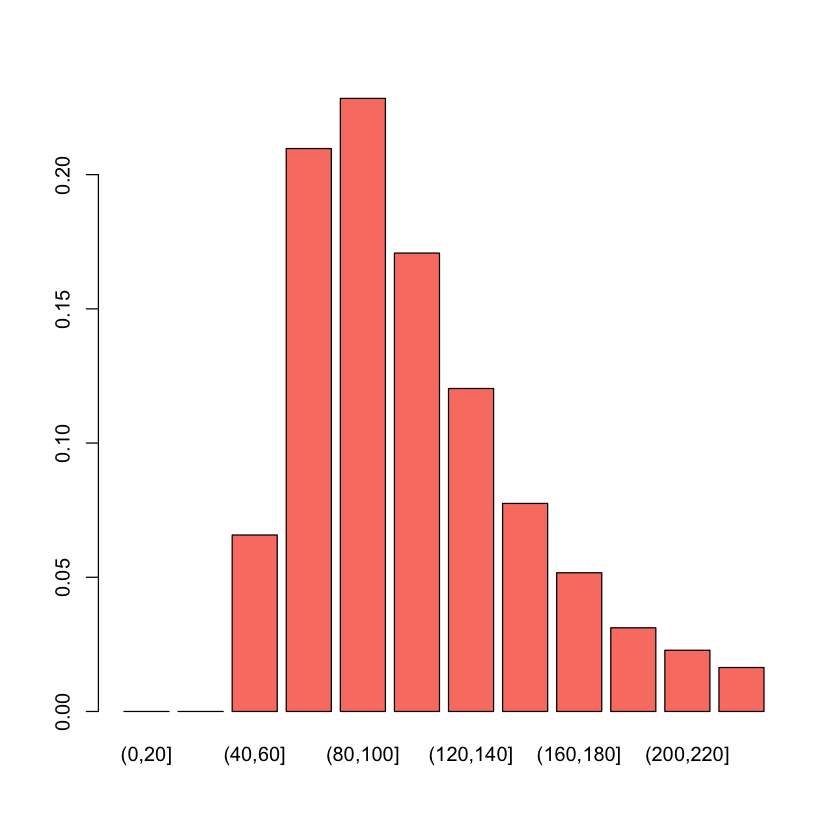

In [12]:
# The posterior distribution showing the probability of different number of fish
# (binning here in bins of 20 just make the graph easier to interpret)
barplot(table(cut(post_fish, seq(0, 250, 20))) / length(post_fish), col = "salmon")

## Hypothesis (Marked Fish)

In [13]:
n_draw <- 100000
n_fish <- sample(20:250, n_draw, replace = TRUE)

# This is the only part of the code that has changed from the original version above.
pick_fish <- function(n_fish) {
  fish <- rep(0:1, c(n_fish - 20, 20))
  prob_pick <- ifelse(fish == 0, 1.0, 0.5)
  sum(sample(fish, 20, prob = prob_pick))
}

n_marked <- rep(NA, n_draw)
for(i in 1:n_draw) {
  n_marked[i] <- pick_fish(n_fish[i])
}

post_fish <- n_fish[n_marked == 5]

#hist(post_fish)

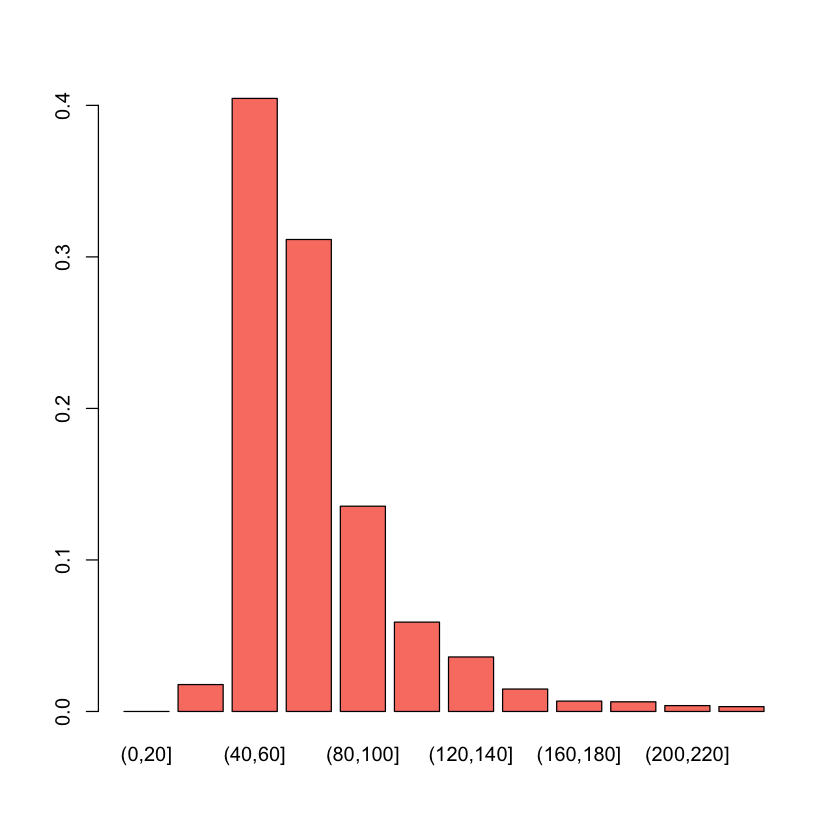

In [14]:
barplot(table(cut(post_fish, seq(0, 250, 20))) / length(post_fish), col = "salmon")

In [15]:
## Hyphothesis at least 200 fish

In [16]:
n_draw <- 100000

# This is the only part of the code that has changed from the original version above.
n_fish <- rnbinom(n_draw, mu = 200 - 20, size = 4) + 20
#hist(n_fish)

In [17]:
pick_fish <- function(n_fish) {
  fish <- rep(0:1, c(n_fish - 20, 20))
  prob_pick <- ifelse(fish == 0, 1.0, 0.5)
  sum(sample(fish, 20, prob = prob_pick))
}

n_marked <- rep(NA, n_draw)
for(i in 1:n_draw) {
  n_marked[i] <- pick_fish(n_fish[i])
}

post_fish <- n_fish[n_marked == 5]

#hist(post_fish)

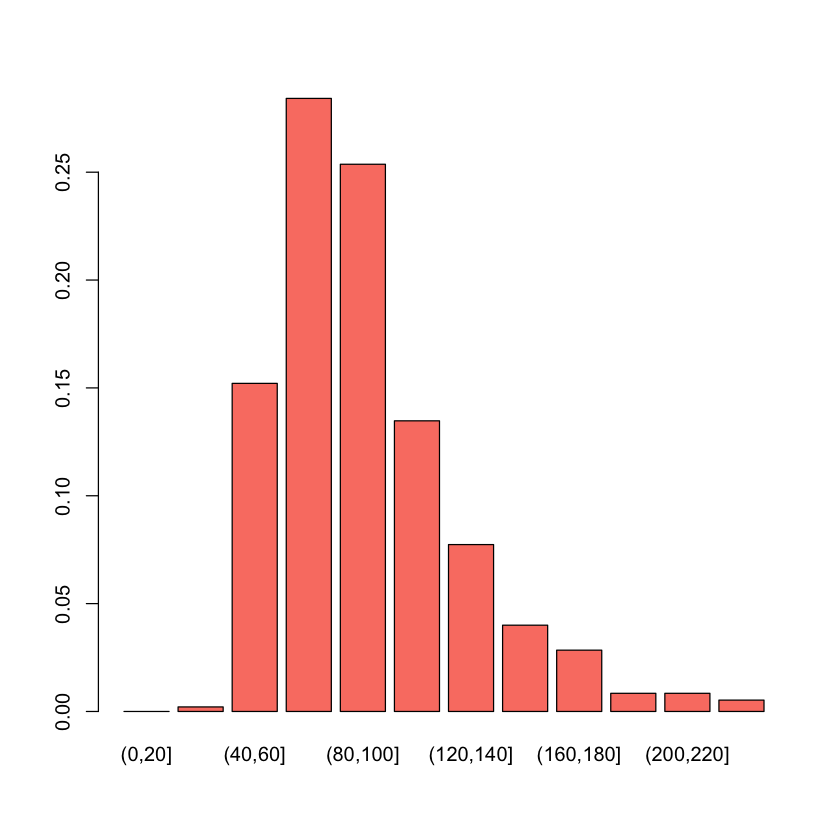

In [10]:
barplot(table(cut(post_fish, seq(0, 250, 20))) / length(post_fish), col = "salmon")